In [59]:
!pip install numpy pandas matplotlib seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [93]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_excel("C:/Users/rocke/OneDrive/Desktop/assignment/Clustering/EastWestAirlines.xlsx",sheet_name="data")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [94]:
df.drop(columns=['ID#','cc1_miles','cc2_miles','cc3_miles'],inplace=True)
df

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,174,1,0,0,7000,0
1,19244,0,215,2,0,0,6968,0
2,41354,0,4123,4,0,0,7034,0
3,14776,0,500,1,0,0,6952,0
4,97752,0,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...
3994,18476,0,8525,4,200,1,1403,1
3995,64385,0,981,5,0,0,1395,1
3996,73597,0,25447,8,0,0,1402,1
3997,54899,0,500,1,500,1,1401,0


In [95]:
# Handling missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [96]:
# Check for missing values
print(df.isnull().sum())

Balance              0
Qual_miles           0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


In [97]:
# Removing outliers using Z-score
from scipy.stats import zscore
z_scores = np.abs(zscore(df_imputed))
df_no_outliers = df_imputed[(z_scores < 3).all(axis=1)]

In [99]:
# Scaling the features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_no_outliers), columns=df_no_outliers.columns)

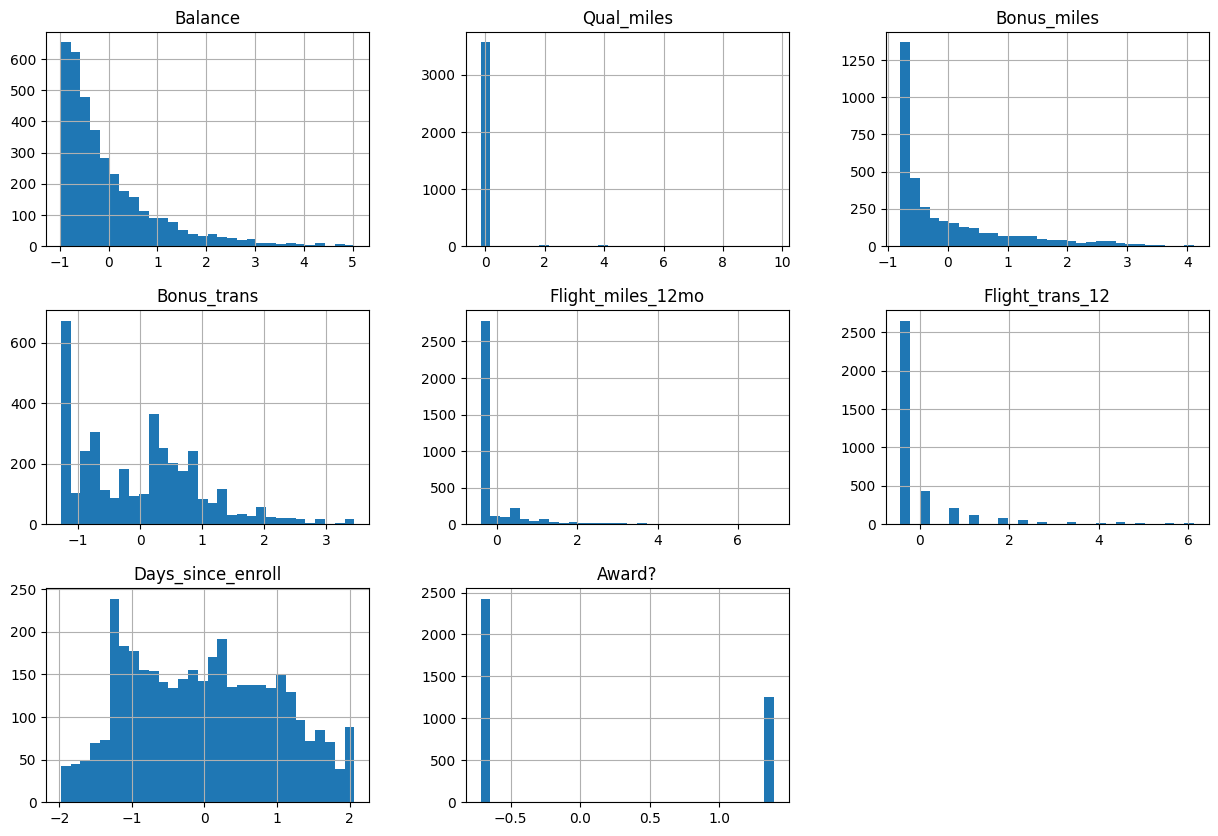

In [100]:
# Exploratory Data Analysis (EDA)
# Distribution Analysis
df_scaled.hist(bins=30, figsize=(15, 10))
plt.show()

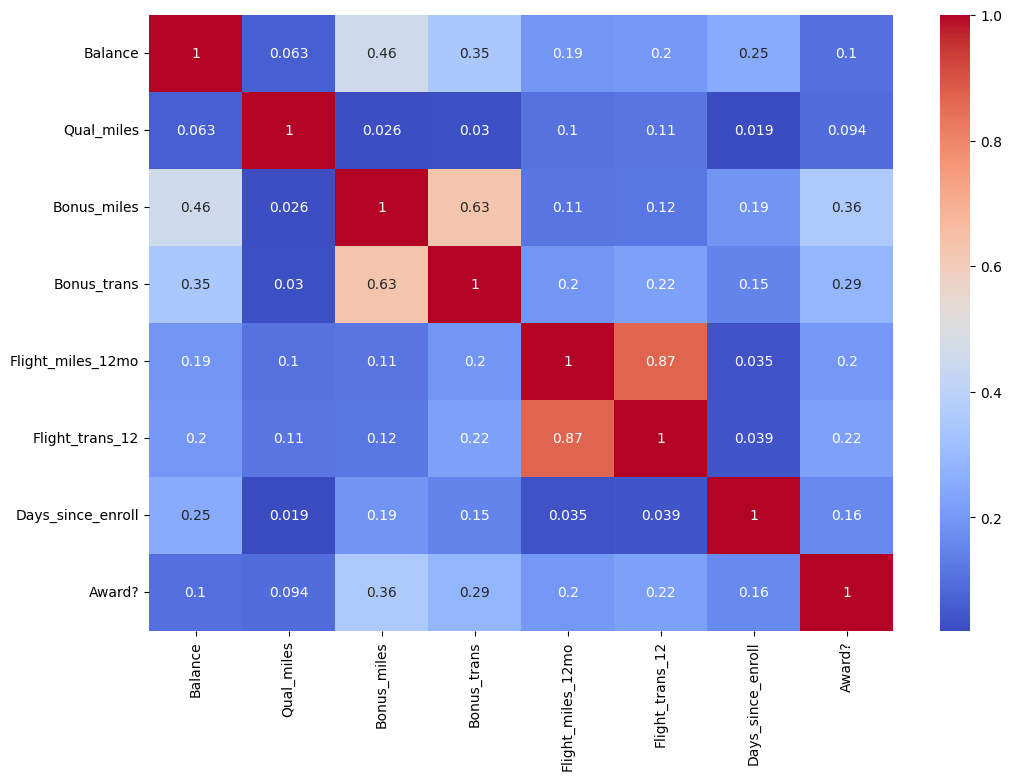

In [101]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm')
plt.show()

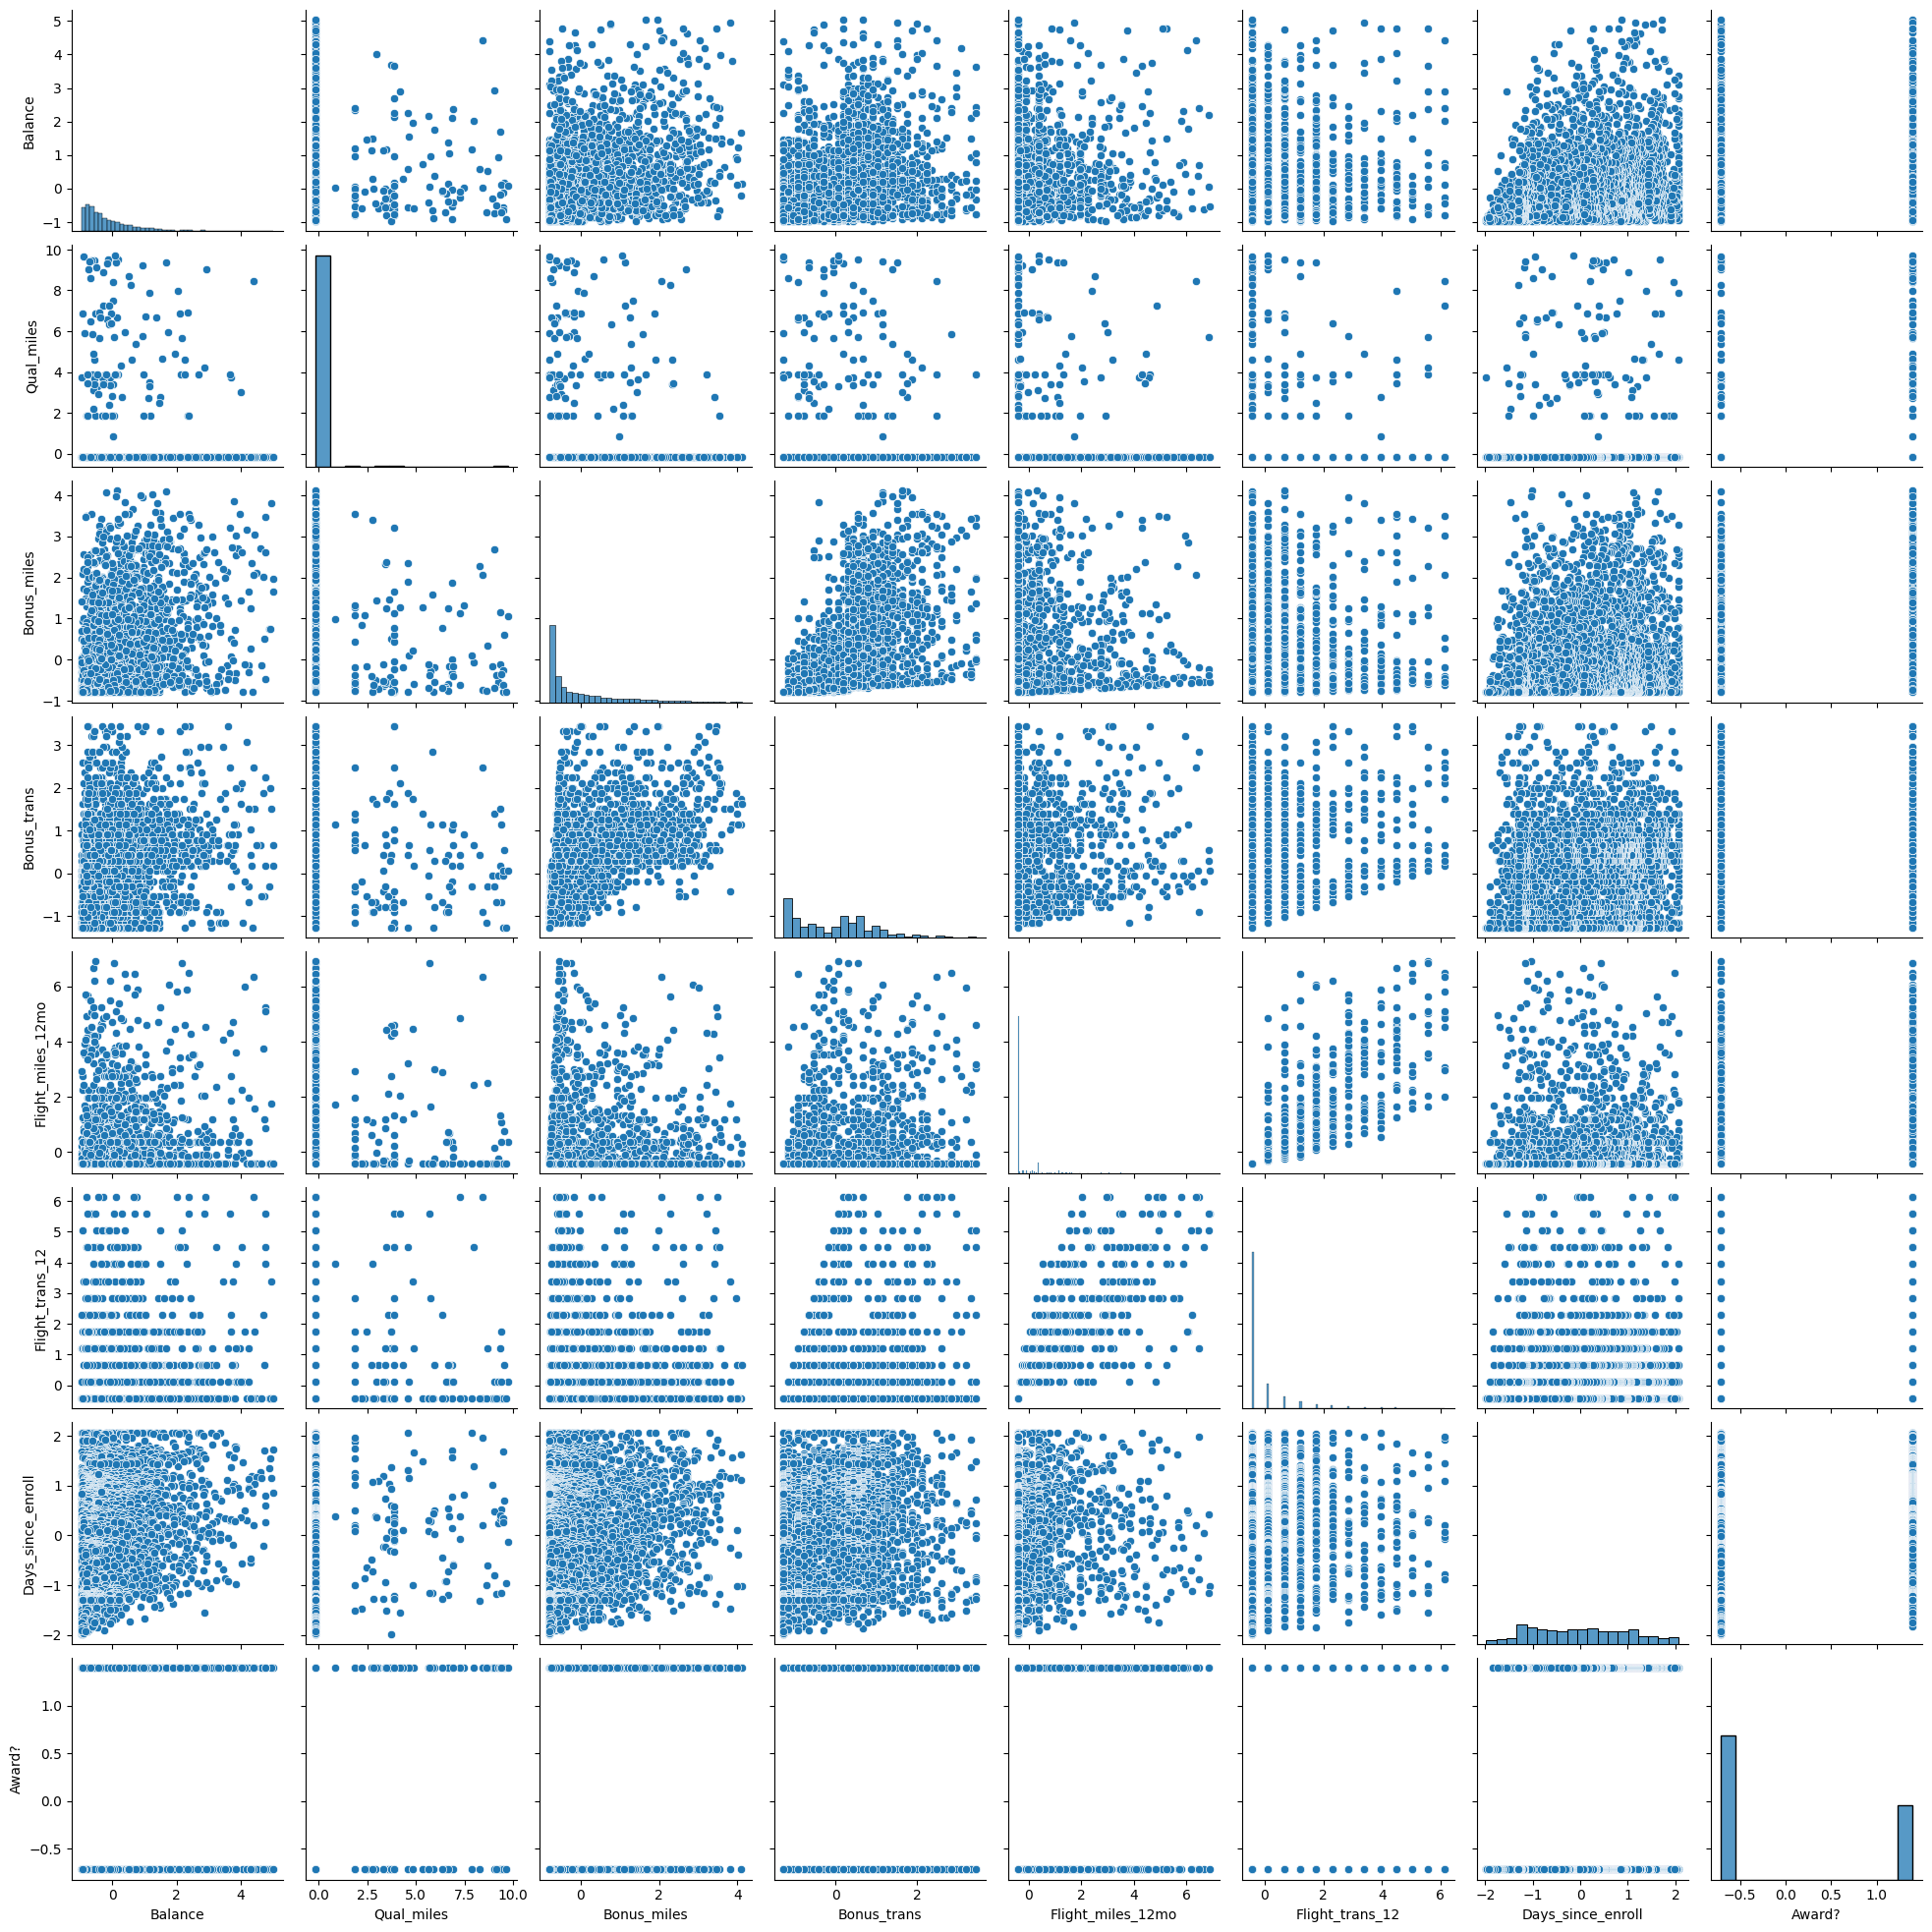

In [102]:
# Pair plot
sns.pairplot(df_scaled)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

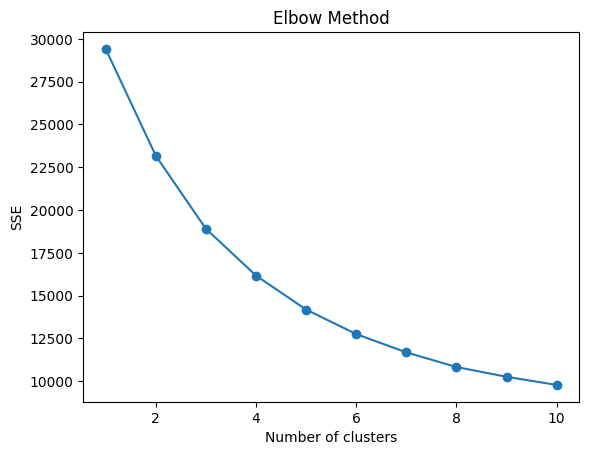

In [104]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Finding the optimal number of clusters using the Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=2)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [105]:
sse

[29416.000000000004,
 23170.06527217943,
 18904.62282252971,
 16169.78483574573,
 14184.768180272775,
 12750.325508026732,
 11684.270970838717,
 10826.39962555352,
 10256.679879136878,
 9779.990607722615]

In [106]:
# Applying K-Means with the optimal number of clusters
optimal_k = 3  # Assume 3 from the Elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

# Silhouette score for K-Means
silhouette_kmeans = silhouette_score(df_scaled, kmeans_labels)
print(f'Silhouette Score for K-Means: {silhouette_kmeans}')

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for K-Means: 0.27794071622044697


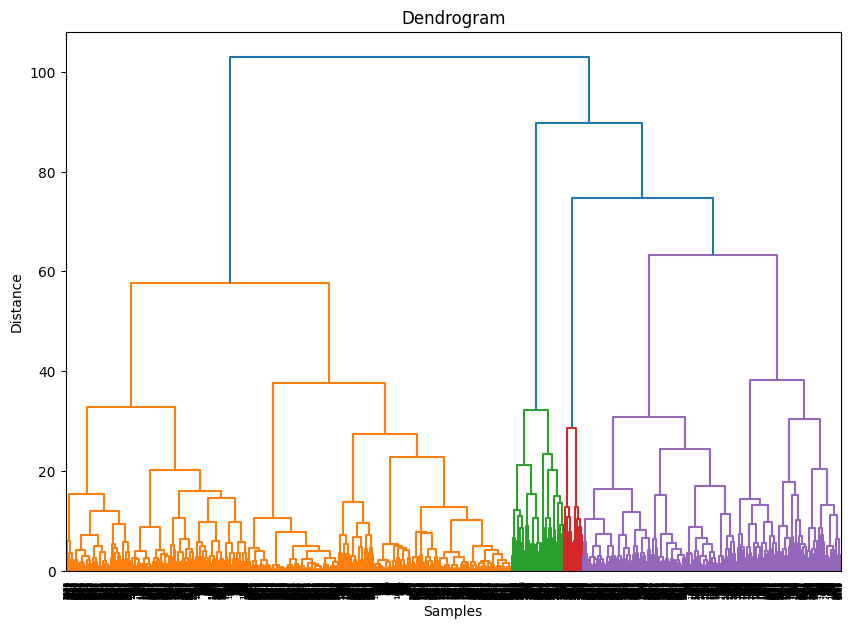

In [108]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Creating the linkage matrix
Z = linkage(df_scaled, method='ward')

# Dendrogram to find the optimal number of clusters
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [109]:
# Applying Hierarchical Clustering
hc_labels = fcluster(Z, t=3, criterion='maxclust')

# Silhouette score for Hierarchical Clustering
silhouette_hc = silhouette_score(df_scaled, hc_labels)
print(f'Silhouette Score for Hierarchical Clustering: {silhouette_hc}')

Silhouette Score for Hierarchical Clustering: 0.27293251707997973


In [110]:
from sklearn.cluster import DBSCAN

# Applying DBSCAN with different parameter settings
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

# Silhouette score for DBSCAN
silhouette_dbscan = silhouette_score(df_scaled, dbscan_labels)
print(f'Silhouette Score for DBSCAN: {silhouette_dbscan}')

Silhouette Score for DBSCAN: -0.3664730631222936


In [111]:
# Adding cluster labels to the dataframe
df_scaled['KMeans_Cluster'] = kmeans_labels
df_scaled['HC_Cluster'] = hc_labels
df_scaled['DBSCAN_Cluster'] = dbscan_labels

# Descriptive statistics for each cluster
kmeans_summary = df_scaled.groupby('KMeans_Cluster').mean()
hc_summary = df_scaled.groupby('HC_Cluster').mean()
dbscan_summary = df_scaled.groupby('DBSCAN_Cluster').mean()

print("KMeans Cluster Summary:\n", kmeans_summary)
print("Hierarchical Clustering Cluster Summary:\n", hc_summary)
print("DBSCAN Cluster Summary:\n", dbscan_summary)

KMeans Cluster Summary:
                  Balance  Qual_miles  Bonus_miles  Bonus_trans  \
KMeans_Cluster                                                   
0               0.585970    0.053882     0.872547     0.774074   
1               0.535895    0.388789     0.318986     0.667473   
2              -0.427733   -0.083217    -0.575007    -0.559812   

                Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
KMeans_Cluster                                                          
0                       -0.177936        -0.172064           0.407085   
1                        2.931034         2.904434           0.125091   
2                       -0.270018        -0.270172          -0.265201   

                 Award?  HC_Cluster  DBSCAN_Cluster  
KMeans_Cluster                                       
0               0.55424    2.468266       -0.065015  
1               0.62082    2.128205       -1.000000  
2              -0.41930    1.315814        0.396780  
Hierarch

In [85]:
# Evaluate clustering results
print("Silhouette Score (K-Means):", silhouette_score(data_scaled_df, kmeans_labels))
print("Silhouette Score (Hierarchical):", silhouette_score(data_scaled_df, agg_labels))
print("Silhouette Score (DBSCAN):", silhouette_score(data_scaled_df, dbscan_labels))

Silhouette Score (K-Means): 0.29208662652066236
Silhouette Score (Hierarchical): 0.26359050526851413
Silhouette Score (DBSCAN): -0.3994552312980999


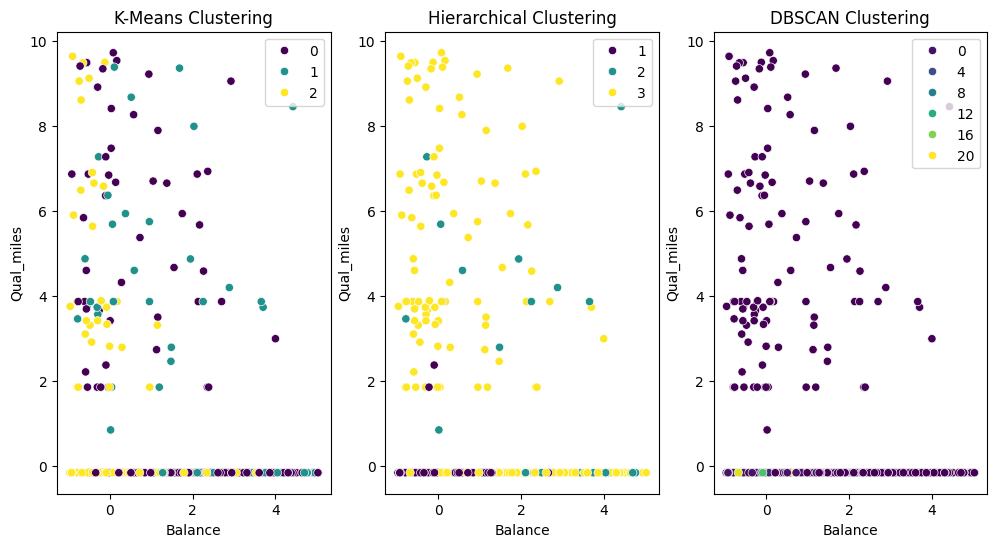

In [112]:
plt.figure(figsize=(12, 6))

# K-Means Clusters
plt.subplot(1, 3, 1)
sns.scatterplot(x=df_scaled.iloc[:, 0], y=df_scaled.iloc[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('K-Means Clustering')

# Hierarchical Clusters
plt.subplot(1, 3, 2)
sns.scatterplot(x=df_scaled.iloc[:, 0], y=df_scaled.iloc[:, 1], hue=hc_labels, palette='viridis')
plt.title('Hierarchical Clustering')

# DBSCAN Clusters
plt.subplot(1, 3, 3)
sns.scatterplot(x=df_scaled.iloc[:, 0], y=df_scaled.iloc[:, 1], hue=dbscan_labels, palette='viridis')
plt.title('DBSCAN Clustering')

plt.show()

In [113]:
print(f'Silhouette Score for K-Means: {silhouette_kmeans}')
print(f'Silhouette Score for Hierarchical Clustering: {silhouette_hc}')
print(f'Silhouette Score for DBSCAN: {silhouette_dbscan}')

Silhouette Score for K-Means: 0.27794071622044697
Silhouette Score for Hierarchical Clustering: 0.27293251707997973
Silhouette Score for DBSCAN: -0.3664730631222936
